In [2]:
import pandas as pd
import numpy as np
from random import randint
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def sigmoid(x):
    return (1 / (1+exp(-x)))

def sigmoid_derivative(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [4]:
class NeuralNetwork():
    
    """defining for a multi-layer Neural Network"""
    
    def __init__(self,train_data,train_labels,units):
        """
        train_data = normalized training data with 1 already appended at the end
        train_labels = vectorized labels for training_data, 1 for actual class, 0 otherwise
        units = list containing number of units for hidden layer as well as number of classes
        """
        units.insert(0,train_data.shape[1])
        self.units = units
        self.layers = len(self.units)
        self.train_data, self.train_labels = train_data, train_labels
        np.random.seed(0)
        self.weights = []
        for i in range(self.layers-1):
            self.weights.append(np.random.randn(self.units[i],self.units[i+1]))
        self.success_rates = [] # so we can plot them later
            
    def feed_forward(self,data):
        sigmoid_v = np.vectorize(sigmoid)
        sigmoid_d_v = np.vectorize(sigmoid_derivative)
        self.sigmoid_results = [data]
        self.sigmoid_d_results = []
        for i in range(self.layers-1):
            self.sigmoid_results.append([])
            self.sigmoid_d_results.append([])
        for layer in range(self.layers-1):
            for row in range(data.shape[0]):
                product = np.dot(self.sigmoid_results[layer][row],self.weights[layer])
                self.sigmoid_results[layer+1].append(sigmoid_v(product))
                self.sigmoid_d_results[layer].append(sigmoid_d_v(product))
                
    def error_derivative(self):
        self.errors = np.array(self.sigmoid_results[-1]) - self.train_labels
        
    def backprop(self):
        self.deltas = []
        for layer in range(self.layers-1):
            self.deltas.append([])        
        for row in range(self.train_data.shape[0]):
            D = np.diag(self.sigmoid_d_results[-1][row])
            err = self.errors[row].reshape(self.errors.shape[1],1)
            delta = np.dot(D,err)
            self.deltas[0].append(delta)
            for x in range(self.layers-2):
                D_i = -(x+2)
                w_i = -(x+1)
                D = np.diag(self.sigmoid_d_results[D_i][row])
                w = self.weights[w_i]
                delta_i = self.deltas[x][row]
                delta = np.dot(np.dot(D,w),delta_i)
                self.deltas[x+1].append(delta)
            
    def correct(self,gamma):
        for row in range(self.train_data.shape[0]):
            for x in range(self.layers-1):
                d = self.deltas[x][row].T
                o_i = -(x+2)
                wt_i = -(x+1)
                o = self.sigmoid_results[o_i][row].reshape(self.sigmoid_results[o_i][row].shape[0],1)
                Delta = -gamma * np.dot(o,d)
                self.weights[wt_i] = self.weights[wt_i] + Delta
            
    def check_class(self):
        self.class_check = np.zeros((self.train_labels.shape))
        for row in range(self.train_labels.shape[0]):
            self.class_check[row,int(self.sigmoid_results[-1][row].argmax())] += 1
            
    def accuracy_check(self):
        total = self.train_labels.shape[0]
        correct = 0
        for row in range(total):
            if np.array_equal(self.train_labels[row],self.class_check[row]):
                correct += 1
        return (correct/total)
    
    def train(self,iterations=100,gamma=0.001):
        for iteration in range(iterations):
            self.feed_forward(self.train_data)
            self.check_class()
            print(self.accuracy_check())
            self.success_rates.append(self.accuracy_check())
            self.error_derivative()
            self.backprop()
            self.correct(gamma)
            
    def predict(self,test_data,test_labels):
        self.test_data, self.test_labels = test_data, test_labels
        self.feed_forward(self.test_data)
        predictions = []
        for row in range(self.test_data.shape[0]):
            predictions.append(int(self.sigmoid_results[-1][row].argmax()))
        self.pred_array = np.array(predictions)
        
    def error_rate(self):
        bools = np.equal(self.pred_array,self.test_labels.flatten())
        correct = np.sum(bools)
        return (self.test_labels.shape[0]-correct)/self.test_labels.shape[0]
        #return pred
        
    def confusion_matrix(self):
        self.confusion = np.zeros((self.units[-1],self.units[-1]))
        for row in range(self.test_labels.shape[0]):
            self.confusion[int(self.test_labels[row]),int(self.pred_array[row])] += 1
        return self.confusion

In [5]:
trainset = np.loadtxt('zip.train')

constant_coefficient = np.ones((trainset.shape[0],1))
train_data = np.concatenate((trainset[:,1:],constant_coefficient),axis=-1)

In [6]:
train_labels = np.zeros((trainset.shape[0],10))
for i in range(trainset.shape[0]):
    train_labels[i,int(trainset[i,0])] += 1

In [33]:
nn = NeuralNetwork(train_data,train_labels,[50,50,10])
nn.train()

0.10204361541626664
0.09395144698943904
0.09230558222466054
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.14154436977095047
0.23522150596625976
0.2474283363050336
0.2726649293649705
0.2921409957481827
0.2843231381154848
0.2974900562337128
0.2969414346454533
0.30462213688108625
0.3069537786311891
0.31340008229323824
0.31532025785214646
0.32108078452887123
0.3242353586613633
0.32903579755863394
0.3352077904265533
0.3400082293238239
0.34659168838293786
0.3570154985598683
0.3637361130160472
0.3733369908105884
0.38088053764915647
0.389109861473049
0.3950075435468386
0.4011795364147579
0.40474557673844463
0.4088602386503909
0.41297490056233715
0.41626663009189413
0.42010698120971063
0.42586750788643535
0.42573035248937047
0.4324509669455493
0.43368536551913317
0.4379371828281443


In [34]:
nn2 = NeuralNetwork(train_data,train_labels,[100,50,10])
nn2.train(iterations=500,gamma=0.001)

0.08174461665066521
0.07228089425318886
0.07625840076807022
0.07625840076807022
0.07625840076807022
0.07612124537100536
0.11466191194623508
0.11918804004937594
0.12837745165272255
0.14209299135921
0.17720477300781787
0.2312439994513784
0.26128103140858594
0.2596351666438074
0.27993416540940885
0.28185434096831713
0.29392401591002604
0.2892607324098203
0.29735290083664795
0.2932382389247017
0.29982169798381564
0.2959813468659992
0.30242765052804826
0.29982169798381564
0.3039363598957619
0.30325058291043755
0.3065423124399945
0.30640515704292964
0.30901110958716227
0.31010835276368126
0.3107941297490056
0.3120285283225895
0.3131257714991085
0.31545741324921134
0.3164175010286655
0.31916060896996296
0.3214922507200658
0.3253326018378823
0.32793855438211494
0.3319160608969963
0.33479632423535866
0.3390481415443698
0.34192840488273213
0.34467151282402964
0.34755177616239197
0.35043203950075436
0.35358661363324645
0.35756412014812783
0.3607186942806199
0.36346180222191743
0.3656562885749554


0.8976820737896036
0.8986421615690577
0.8991907831573173
0.8993279385543821
0.9001508709367714
0.9004251817309011
0.9011109587162255
0.9019338910986148
0.9026196680839391
0.9034426004663284
0.9031682896721986
0.903854066657523
0.9052256206281717
0.9054999314223015
0.9057742422164312
0.9065971745988205
0.9074201069812097
0.908243039363599
0.9087916609518585
0.909340282540118
0.9100260595254424
0.9104375257166369
0.9109861473048965
0.9116719242902208
0.9123577012755452
0.9126320120696749
0.9129063228638047
0.9130434782608695
0.9134549444520642
0.913729255246194
0.9140035660403237
0.9142778768344534
0.9145521876285831
0.9148264984227129
0.9153751200109724
0.9156494308051022
0.9156494308051022
0.915923741599232
0.9164723631874915
0.9170209847757509
0.9172952955698807
0.9178439171581402
0.9178439171581402
0.917981072555205
0.9181182279522699
0.9182553833493348
0.919078315731724
0.9193526265258538
0.9196269373199836
0.9196269373199836
0.9204498697023727
0.9207241804965025
0.9214099574818269


In [7]:
testset = np.loadtxt('zip.test')
constant_coefficient = np.ones((testset.shape[0],1))
test_data = np.concatenate((testset[:,1:],constant_coefficient),axis=-1)
test_labels = testset[:,0]

In [48]:
nn = NeuralNetwork(train_data,train_labels,[10,10])
nn.train(iterations=25)
nn.predict(test_data,test_labels)
print("error rate for test set =",nn.error_rate())
nn.confusion_matrix()

0.07598408997394047
0.08078452887121108
0.09326567000411466
0.1608832807570978
0.18214236730215333
0.19818954875874364
0.21451104100946372
0.2286380469071458
0.24715402551090385
0.2610067206144562
0.2674530242765053
0.27019613221780275
0.278699766835825
0.2832258949389658
0.29131806336579347
0.3007817857632698
0.3140858592785626
0.323549581676039
0.33548210122068306
0.34467151282402964
0.354135235221506
0.3627760252365931
0.37086819366342066
0.37621725414895074
0.38005760526676724
error rate for test set = 0.632286995516


array([[ 278.,   25.,   10.,    4.,    6.,    0.,    0.,   35.,    1.,
           0.],
       [   6.,  254.,    0.,    0.,    2.,    1.,    0.,    1.,    0.,
           0.],
       [  69.,   46.,   44.,    2.,    7.,    1.,    0.,   29.,    0.,
           0.],
       [  37.,   16.,    5.,    3.,   44.,    2.,    0.,   56.,    3.,
           0.],
       [  37.,   62.,    3.,    0.,   63.,    1.,    0.,   31.,    1.,
           2.],
       [  56.,   17.,   29.,    4.,   19.,    0.,    0.,   29.,    5.,
           1.],
       [  93.,   57.,    9.,    0.,    2.,    0.,    0.,    9.,    0.,
           0.],
       [  25.,    8.,   12.,    0.,    9.,    0.,    0.,   88.,    5.,
           0.],
       [  24.,   25.,   16.,    0.,   36.,    2.,    0.,   57.,    4.,
           2.],
       [  13.,   31.,    5.,    0.,   61.,    1.,    0.,   54.,    8.,
           4.]])

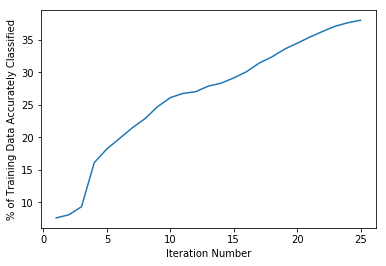

In [55]:
x = list(range(1,26))
y = list(map((lambda x: x*100),nn.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("% of Training Data Accurately Classified")
plt.plot(x,y)

0.1527911123302702
0.19873817034700317
0.2172541489507612
0.1975037717734193
0.20833904814154436
0.21382526402413934
0.21835139212728022
0.22342614181868056
0.22767795912769168
0.23247839802496229
0.239336167878206
0.24482238376080098
0.2557948155259909
0.2586750788643533
0.26018378823206695
0.2608695652173913
0.26237827458510493
0.2648470717322727
0.26704155808531066
0.2684131120559594
0.2695103552324784
0.27197915237964615
0.27417363873268413
0.27623096968865724
0.2782883006446304
error rate for test set = 0.728948679621
[[ 258.   70.   26.    0.    0.    0.    0.    0.    1.    4.]
 [   8.  256.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 127.   46.   24.    0.    0.    0.    0.    0.    0.    1.]
 [  93.   60.   12.    0.    0.    0.    0.    0.    0.    1.]
 [  92.   85.   18.    0.    0.    0.    0.    0.    0.    5.]
 [ 102.   38.   18.    0.    0.    0.    0.    0.    0.    2.]
 [  99.   67.    4.    0.    0.    0.    0.    0.    0.    0.]
 [  82.   17.   45.    0.    0

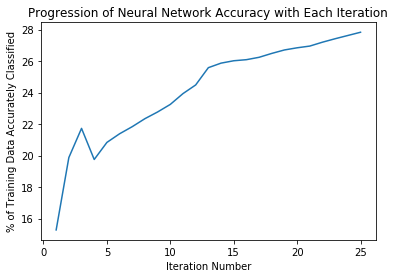

In [59]:
nn = NeuralNetwork(train_data,train_labels,[10,5,10])
nn.train(iterations=25)
nn.predict(test_data,test_labels)
print("error rate for test set =",nn.error_rate())
print(nn.confusion_matrix())

x = list(range(1,26))
y = list(map((lambda x: x*100),nn.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("% of Training Data Accurately Classified")
plt.title("Progression of Neural Network Accuracy with Each Iteration")
plt.plot(x,y)

0.10204361541626664
0.09395144698943904
0.09230558222466054
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.09107118365107666
0.14154436977095047
0.23522150596625976
0.2474283363050336
0.2726649293649705
0.2921409957481827
0.2843231381154848
0.2974900562337128
0.2969414346454533
0.30462213688108625
0.3069537786311891
0.31340008229323824
0.31532025785214646
0.32108078452887123
0.3242353586613633
0.32903579755863394
0.3352077904265533
0.3400082293238239
0.34659168838293786
0.3570154985598683
0.3637361130160472
0.3733369908105884
0.38088053764915647
0.389109861473049
0.3950075435468386
0.4011795364147579
0.40474557673844463
0.4088602386503909
0.41297490056233715
0.41626663009189413
0.42010698120971063
0.42586750788643535
0.42573035248937047
0.4324509669455493
0.43368536551913317
0.4379371828281443


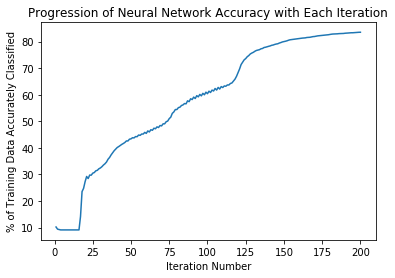

In [60]:
nn = NeuralNetwork(train_data,train_labels,[50,50,10])
nn.train(iterations=200)
nn.predict(test_data,test_labels)
print("error rate for test set =",nn.error_rate())
print(nn.confusion_matrix())

x = list(range(1,201))
y = list(map((lambda x: x*100),nn.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("% of Training Data Accurately Classified")
plt.title("Progression of Neural Network Accuracy with Each Iteration")
plt.plot(x,y)

In [8]:
nn = NeuralNetwork(train_data,train_labels,[100,100,10])
nn.train(iterations=1000,gamma=0.001)

0.1592374159923193
0.1796735701549856
0.15745439583047594
0.08901385269510355
0.10410094637223975
0.16499794266904402
0.17761623919901248
0.17144424633109312
0.1855712522287752
0.17363873268413113
0.19489781922918667
0.17775339459607736
0.20504731861198738
0.18680565080235909
0.21231655465642574
0.20024687971471677
0.2205458784803182
0.21601975037717736
0.23316417501028666
0.23659305993690852
0.25140584281991496
0.26128103140858594
0.27499657111507336
0.2866547798655877
0.29858729941023177
0.3055822246605404
0.3010560965573995
0.3096968865724866
0.3039363598957619
0.310382663557811
0.31065697435194073
0.31024550816074614
0.3107941297490056
0.31134275133726513
0.3116170621313949
0.3116170621313949
0.3118913729255246
0.31216568371965436
0.3120285283225895
0.31216568371965436
0.31230283911671924
0.3127143053079139
0.3127143053079139
0.3129886161020436
0.3131257714991085
0.31326292689617335
0.3135372376903031
0.3138115484844329
0.31422301467562747
0.3144973254697572
0.3144973254697572
0.31

0.6831710327801399
0.683033877383075
0.6834453435742697
0.6835824989713345
0.6835824989713345
0.6837196543683994
0.6839939651625292
0.6842682759566588
0.6846797421478535
0.6848168975449184
0.6850912083390481
0.6850912083390481
0.6853655191331779
0.6855026745302427
0.6857769853243725
0.6861884515155672
0.6861884515155672
0.686325606912632
0.6864627623096969
0.6864627623096969
0.6865999177067618
0.6870113838979564
0.6870113838979564
0.6870113838979564
0.6870113838979564
0.6870113838979564
0.6872856946920861
0.687422850089151
0.6875600054862159
0.6876971608832808
0.6876971608832808
0.6876971608832808
0.6887944040597997
0.6887944040597997
0.6887944040597997
0.6887944040597997
0.6889315594568646
0.6892058702509943
0.6893430256480593
0.6893430256480593
0.6893430256480593
0.6894801810451241
0.6894801810451241
0.6894801810451241
0.689617336442189
0.6900288026333836
0.6903031134275134
0.690714579618708
0.6908517350157729
0.6909888904128377
0.6909888904128377
0.6914003566040323
0.691537512001097

0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7952269921821423
0.7953641475792073
0.7953641475792073
0.7953641475792073
0.7955013029762721
0.7955013029762721
0.795638458373337
0.795638458373337
0.795638458373337
0.795638458373337
0.795638458373337
0.7957756137704018
0.7957756137704018
0.7957756137704018
0.7957756137704018
0.7957756137704018
0.7957756137704018
0.7959127691674668
0.7959127691674668
0.7959127691674668
0.7959127691674668
0.7959127691674668
0.7959127691674668
0.7960499245645316
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7961870799615964
0.7963242353586614
0.7964613907557262
0.7964613907557262
0.7964613907557262
0.7964613907557262
0.7964613907557262
0.796461390755726

error rate for test set = 0.259093173891
[[ 345.    0.    2.    0.    0.    1.    8.    0.    2.    1.]
 [   0.  253.    0.    2.    0.    0.    3.    0.    2.    4.]
 [   3.    1.  170.    9.    0.    5.    3.    0.    6.    1.]
 [   5.    0.    3.  135.    0.   17.    2.    0.    3.    1.]
 [  10.    6.   18.    8.    0.   11.   18.    0.   27.  102.]
 [   7.    0.    0.   10.    0.  132.    1.    0.    6.    4.]
 [   3.    1.    4.    1.    0.    4.  155.    0.    1.    1.]
 [   6.    1.   28.   21.    0.    7.    1.    0.    9.   74.]
 [   6.    1.    4.    6.    0.    5.    8.    0.  131.    5.]
 [   0.    2.    2.    1.    0.    1.    1.    0.    4.  166.]]


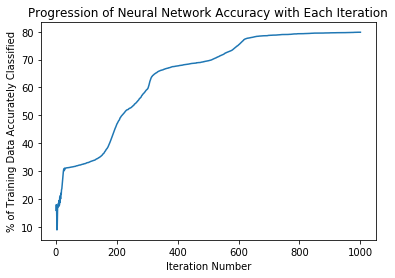

In [10]:
nn.predict(test_data,test_labels)
print("error rate for test set =",nn.error_rate())
print(nn.confusion_matrix())

x = list(range(1,1001))
y = list(map((lambda x: x*100),nn.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("% of Training Data Accurately Classified")
plt.title("Progression of Neural Network Accuracy with Each Iteration")
plt.plot(x,y)

In [11]:
nn2 = NeuralNetwork(train_data,train_labels,[100,50,10])
nn2.train(iterations=1000,gamma=0.001)

0.08174461665066521
0.07228089425318886
0.07625840076807022
0.07625840076807022
0.07625840076807022
0.07612124537100536
0.11466191194623508
0.11918804004937594
0.12837745165272255
0.14209299135921
0.17720477300781787
0.2312439994513784
0.26128103140858594
0.2596351666438074
0.27993416540940885
0.28185434096831713
0.29392401591002604
0.2892607324098203
0.29735290083664795
0.2932382389247017
0.29982169798381564
0.2959813468659992
0.30242765052804826
0.29982169798381564
0.3039363598957619
0.30325058291043755
0.3065423124399945
0.30640515704292964
0.30901110958716227
0.31010835276368126
0.3107941297490056
0.3120285283225895
0.3131257714991085
0.31545741324921134
0.3164175010286655
0.31916060896996296
0.3214922507200658
0.3253326018378823
0.32793855438211494
0.3319160608969963
0.33479632423535866
0.3390481415443698
0.34192840488273213
0.34467151282402964
0.34755177616239197
0.35043203950075436
0.35358661363324645
0.35756412014812783
0.3607186942806199
0.36346180222191743
0.3656562885749554


0.8976820737896036
0.8986421615690577
0.8991907831573173
0.8993279385543821
0.9001508709367714
0.9004251817309011
0.9011109587162255
0.9019338910986148
0.9026196680839391
0.9034426004663284
0.9031682896721986
0.903854066657523
0.9052256206281717
0.9054999314223015
0.9057742422164312
0.9065971745988205
0.9074201069812097
0.908243039363599
0.9087916609518585
0.909340282540118
0.9100260595254424
0.9104375257166369
0.9109861473048965
0.9116719242902208
0.9123577012755452
0.9126320120696749
0.9129063228638047
0.9130434782608695
0.9134549444520642
0.913729255246194
0.9140035660403237
0.9142778768344534
0.9145521876285831
0.9148264984227129
0.9153751200109724
0.9156494308051022
0.9156494308051022
0.915923741599232
0.9164723631874915
0.9170209847757509
0.9172952955698807
0.9178439171581402
0.9178439171581402
0.917981072555205
0.9181182279522699
0.9182553833493348
0.919078315731724
0.9193526265258538
0.9196269373199836
0.9196269373199836
0.9204498697023727
0.9207241804965025
0.9214099574818269


0.9624194212042244
0.9625565766012892
0.9625565766012892
0.9625565766012892
0.9626937319983542
0.9626937319983542
0.9626937319983542
0.9626937319983542
0.9626937319983542
0.962830887395419
0.962830887395419
0.962830887395419
0.962830887395419
0.962830887395419
0.962830887395419
0.9629680427924839
0.9629680427924839
0.9629680427924839
0.9629680427924839
0.9631051981895488
0.9631051981895488
0.9632423535866136
0.9633795089836785
0.9633795089836785
0.9633795089836785
0.9633795089836785
0.9633795089836785
0.9635166643807433
0.9636538197778083
0.9636538197778083
0.9637909751748731
0.9637909751748731
0.9637909751748731
0.9637909751748731
0.963928130571938
0.9640652859690029
0.9640652859690029
0.9640652859690029
0.9640652859690029
0.9642024413660678
0.9642024413660678
0.9643395967631326
0.9644767521601975
0.9644767521601975
0.9644767521601975
0.9644767521601975
0.9646139075572624
0.9646139075572624
0.9646139075572624
0.9646139075572624
0.9647510629543272
0.9648882183513922
0.965025373748457
0

error rate for test set = 0.122571001495
[[ 340.    0.    5.    2.    3.    2.    5.    1.    1.    0.]
 [   0.  249.    0.    2.    6.    1.    4.    0.    0.    2.]
 [   4.    0.  166.    5.    9.    2.    4.    2.    6.    0.]
 [   5.    0.    7.  132.    2.   13.    0.    1.    5.    1.]
 [   3.    1.    7.    0.  176.    4.    3.    2.    1.    3.]
 [   2.    0.    0.   11.    5.  129.    4.    0.    3.    6.]
 [   5.    0.    2.    1.    2.    4.  155.    0.    1.    0.]
 [   3.    0.    1.    3.    5.    1.    0.  127.    0.    7.]
 [   5.    1.    4.    9.    6.    5.    1.    2.  129.    4.]
 [   0.    0.    1.    2.    5.    1.    0.    7.    3.  158.]]


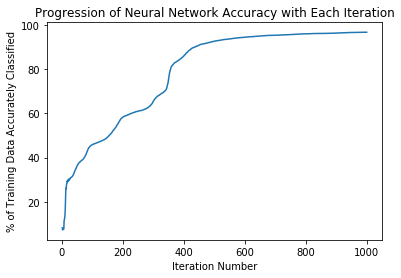

In [12]:
nn2.predict(test_data,test_labels)
print("error rate for test set =",nn2.error_rate())
print(nn2.confusion_matrix())

x = list(range(1,1001))
y = list(map((lambda x: x*100),nn2.success_rates))
plt.xlabel("Iteration Number")
plt.ylabel("% of Training Data Accurately Classified")
plt.title("Progression of Neural Network Accuracy with Each Iteration")
plt.plot(x,y)